In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("globalterrorismdb.csv", encoding = "ISO-8859-1")

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


important: 
iyear imonth iday --> to construct date
attacktype1 1-9
suicide 0-1





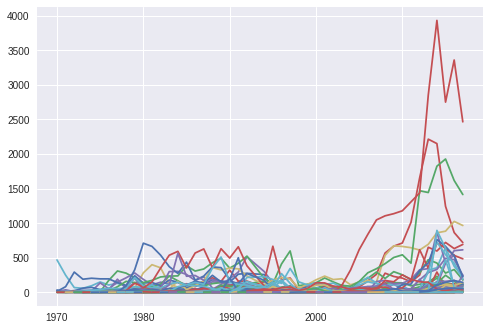

In [4]:
plt.style.use("seaborn")

for i in data.country_txt.unique():
    grouped = data.loc[data["country_txt"] == i, "iyear"].groupby([data.iyear]).count()
    plt.plot(grouped, label = i)

In [5]:
grouped_year = data.loc[:, "iyear"].groupby([data.iyear]).count()

Text(0.5, 1.0, 'Attacks per year')

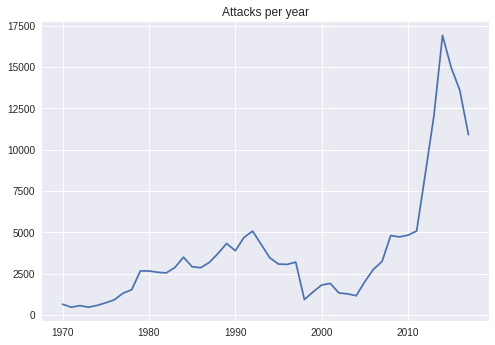

In [59]:
plt.plot(grouped_year)
plt.title("Attacks per year")

In [36]:
grouped_country = data.explode("country_txt").groupby("country_txt")["country_txt"].count().sort_values(ascending=False)[:10]

In [37]:
grouped_country


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

In [55]:
grouped_kill = data.loc[:, ["iyear", "nkill"]].groupby(data.iyear)["nkill"].sum()

Text(0.5, 1.0, 'Killed by terrorist attack worldwide')

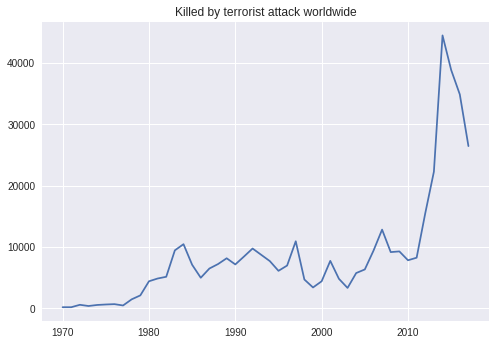

In [58]:
plt.plot(grouped_kill)
plt.title("Killed by terrorist attack worldwide")

In [57]:
grouped_kill

iyear
1970      174.0
1971      173.0
1972      566.0
1973      370.0
1974      539.0
1975      617.0
1976      674.0
1977      456.0
1978     1459.0
1979     2100.0
1980     4400.0
1981     4851.0
1982     5136.0
1983     9444.0
1984    10450.0
1985     7094.0
1986     4976.0
1987     6482.0
1988     7208.0
1989     8152.0
1990     7148.0
1991     8429.0
1992     9742.0
1994     7690.0
1995     6103.0
1996     6966.0
1997    10924.0
1998     4688.0
1999     3393.0
2000     4403.0
2001     7729.0
2002     4805.0
2003     3317.0
2004     5743.0
2005     6331.0
2006     9380.0
2007    12824.0
2008     9157.0
2009     9273.0
2010     7827.0
2011     8246.0
2012    15497.0
2013    22273.0
2014    44490.0
2015    38853.0
2016    34871.0
2017    26445.0
Name: nkill, dtype: float64

In [70]:
grouped_region = data.explode("region").groupby(["region","iyear"])["region"].count()

In [91]:
region = []
year = []
count = list(grouped_region)
for i,j in grouped_region.keys():
    region.append(i)
    year.append(j)
    2
df = pd.DataFrame({"region":region, "year":year, "count":count})

Text(0.5, 1.0, 'Attacks by region')

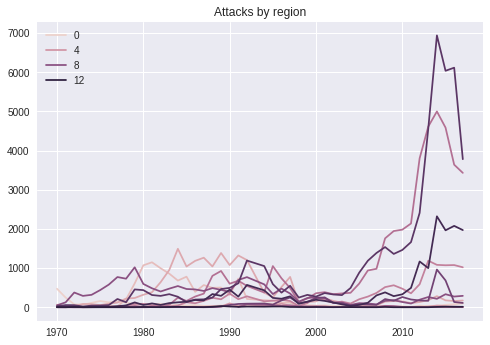

In [96]:
sns.lineplot(data = df, y = count, x = year, hue = region)
plt.title("Attacks by region")

In [93]:
df

,region,year,count
0,1,1970,472
1,1,1971,247
2,1,1972,73
3,1,1973,64
4,1,1974,111
...,...,...,...
524,12,2013,1
525,12,2014,9
526,12,2015,14
527,12,2016,10
